(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [77]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind, chi2_contingency

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [30]:
# A
print("Model X answer formats:")
print(df_x['result'].value_counts(dropna=False))
print("\nModel Y answer formats:")
print(df_y['result'].value_counts(dropna=False))
print("\nModel Z answer formats:")
print(df_z['result'].value_counts(dropna=False))


Model X answer formats:
result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson 

# B
We can see that there is a lot of different formats, not only the expected {A, B, C, D}. We can observe that some results have also a context, and it seems the answer is always included at the end of the context sentence, or sometimes the result is in a form "Answer: X". Moreover, there might be some spaces or other not visible characters (eg "A", " A", "A " are not the same).

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [56]:
#A
# Filter to check if the string is less than 10
filter = lambda s: len(str(s)) < 10

# For Model X:
df_x_filtered = df_x[df_x['result'].apply(filter)].copy(deep=True)

# For Model Y:
df_y_filtered = df_y[df_y['result'].apply(filter)].copy(deep=True)

# For Model Z:
df_z_filtered = df_z[df_z['result'].apply(filter)].copy(deep=True)


In [57]:
print("Model X answer formats:")
print(df_x_filtered['result'].value_counts(dropna=False))
print("\nModel Y answer formats:")
print(df_y_filtered['result'].value_counts(dropna=False))
print("\nModel Z answer formats:")
print(df_z_filtered['result'].value_counts(dropna=False))

#Now its looking better, but we still have a few different formats.

Model X answer formats:
result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
NaN           170
Not Sure       73
Name: count, dtype: int64

Model Y answer formats:
result
D            2894
Answer: D    1718
C            1701
B            1240
D            1145
A            1008
Answer: C     907
Answer: B     726
C             634
Answer: A     597
B             553
A             428
NaN           145
Not Sure       86
Name: count, dtype: int64

Model Z answer formats:
result
D            2257
C            2191
B            2127
A            2060
Answer: D     777
Answer: C     748
Answer: B     712
Answer: A     687
NaN           345
C             316
D             314
B             285
A             279
Not Sure      125
Name: count, dtype: int64


In [ ]:
def clean_answer(s):
    """
    Remove the prefix "Answer:" if present.
    Remove any dashes.
    Remove extra whitespace.
    (optional) Use a regex search to extract a valid answer (A, B, C, or D) - with this we could try to extract the answer from all the results (also with len > 10)
    
    If no valid answer is found, returns np.nan.
    """
    # Check for NaN or None
    if pd.isna(s):
        return np.nan
    
    # Convert to string and strip whitespace
    s = str(s).strip()
    
    # Remove common unwanted substrings
    s = s.replace("Answer:", "").strip()
    
    # Remove any dashes
    s = s.replace("-", "")
    
    # Valid answers
    valid_answers = {"A", "B", "C", "D"}
    
    # If the cleaned string is exactly one of the valid answers, return it
    if s in valid_answers:
        return s
    
    # # The pattern \b([ABCD])\b matches any whole word letter A, B, C, or D.
    # match = re.search(r'\b([ABCD])\b', s, re.IGNORECASE)
    # if match:
    #     return match.group(1).upper()
    
    # If no valid answer is found, return np.nan
    return np.nan

In [60]:
# For Model X:
df_x_filtered['result_clean'] = df_x_filtered['result'].apply(clean_answer)
# For Model Y:
df_y_filtered['result_clean'] = df_y_filtered['result'].apply(clean_answer)
# For Model Z:
df_z_filtered['result_clean'] = df_z_filtered['result'].apply(clean_answer)

print("Model X answer formats:")
print(df_x_filtered['result_clean'].value_counts(dropna=False))
print("\nModel Y answer formats:")
print(df_y_filtered['result_clean'].value_counts(dropna=False))
print("\nModel Z answer formats:")
print(df_z_filtered['result_clean'].value_counts(dropna=False))

# Now the results are good, we have only valid answers A, B, C or D and some missing answers as NaN.

Model X answer formats:
result_clean
A      5788
B      2965
C      2350
D      2333
NaN     243
Name: count, dtype: int64

Model Y answer formats:
result_clean
D      5757
C      3242
B      2519
A      2033
NaN     231
Name: count, dtype: int64

Model Z answer formats:
result_clean
D      3348
C      3255
B      3124
A      3026
NaN     470
Name: count, dtype: int64


In [61]:
#B
print("Model X: Original size =", df_x.shape, ", Filtered size =", df_x_filtered.shape)
print("Model Y: Original size =", df_y.shape, ", Filtered size =", df_y_filtered.shape)
print("Model Z: Original size =", df_z.shape, ", Filtered size =", df_z_filtered.shape)


Model X: Original size = (13882, 2) , Filtered size = (13679, 3)
Model Y: Original size = (13978, 2) , Filtered size = (13782, 3)
Model Z: Original size = (13923, 2) , Filtered size = (13223, 3)


C. /Discuss:/

We lost different amounts of entries for each model. For models X and Y we deleted approx 200 rows, but for model Z it was 700. We also still have NaN values that were not filtered yet, I am not sure what to do with them (Should we delete them or count them as incorrect answer???).  

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [65]:
# A
# Reduced test DataFrame with only question_id and correct answer
df_test_reduced = df_test[['question_id', 'answer', 'subject']]

# For Model X:
df_x_joined = pd.merge(df_x_filtered, df_test_reduced, on='question_id', how='inner')

# For Model Y:
df_y_joined = pd.merge(df_y_filtered, df_test_reduced, on='question_id', how='inner')

# For Model Z:
df_z_joined = pd.merge(df_z_filtered, df_test_reduced, on='question_id', how='inner')



In [66]:
# B
# For Model X:
df_x_joined['correct'] = df_x_joined['result_clean'] == df_x_joined['answer']
avg_score_x = df_x_joined['correct'].mean()

# For Model Y:
df_y_joined['correct'] = df_y_joined['result_clean'] == df_y_joined['answer']
avg_score_y = df_y_joined['correct'].mean()

# For Model Z:
df_z_joined['correct'] = df_z_joined['result_clean'] == df_z_joined['answer']
avg_score_z = df_z_joined['correct'].mean()

# Print the average scores for each model
print("Average score for Model X:", avg_score_x)
print("Average score for Model Y:", avg_score_y)
print("Average score for Model Z:", avg_score_z)

Average score for Model X: 0.7538562760435704
Average score for Model Y: 0.7333478450152373
Average score for Model Z: 0.6397186720108902


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [67]:
#A
subjects = df_test_reduced['subject'].unique()

# List to store subjects with >10% difference
unbalanced_subjects = []

for subj in subjects:
    cnt_x = df_x_joined[df_x_joined['subject'] == subj].shape[0]
    cnt_y = df_y_joined[df_y_joined['subject'] == subj].shape[0]
    cnt_z = df_z_joined[df_z_joined['subject'] == subj].shape[0]
    
    # Determine the minimum and maximum counts across models
    min_cnt = min(cnt_x, cnt_y, cnt_z)
    max_cnt = max(cnt_x, cnt_y, cnt_z)
    
    # Check if the difference relative to the minimum is more than 10%
    if min_cnt > 0 and (max_cnt - min_cnt) / min_cnt > 0.10:
        unbalanced_subjects.append((subj, cnt_x, cnt_y, cnt_z))

# Print the subjects that are unbalanced along with the counts
print("Subjects with >10% difference in question counts (subject, count_X, count_Y, count_Z):")
for entry in unbalanced_subjects:
    print(entry)


Subjects with >10% difference in question counts (subject, count_X, count_Y, count_Z):
('college computer science', 99, 98, 87)
('formal logic', 112, 124, 116)
('logical fallacies', 155, 138, 152)
('moral disputes', 336, 312, 260)
('moral scenarios', 753, 877, 806)


In [37]:
#B

# We can downsample, upsample or calculate accuracy by subjects and aggregate.

In [38]:
#C

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [39]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [71]:
#A
def summarize_accuracy(df):
    # Group by model_name and compute count, mean, and standard deviation.
    summary = df.groupby('model_name')['correct'].agg(['count', 'mean', 'std']).reset_index()
    # Calculate standard error: std / sqrt(n)
    summary['se'] = summary['std'] / np.sqrt(summary['count'])
    return summary

# Compute summaries for both datasets
mmlu_summary = summarize_accuracy(df_mmlu)
other_summary = summarize_accuracy(df_other)

print("MMLU Dataset Summary:")
print(mmlu_summary)
print("\nOther Dataset Summary:")
print(other_summary)

MMLU Dataset Summary:
  model_name  count      mean       std        se
0          X  11696  0.743588  0.436671  0.004038
1          Y  11696  0.761542  0.426159  0.003941
2          Z  11696  0.655951  0.475078  0.004393

Other Dataset Summary:
  model_name  count      mean       std        se
0          X   3759  0.787976  0.408796  0.006668
1          Y   3759  0.720936  0.448599  0.007317
2          Z   3759  0.671721  0.469649  0.007660


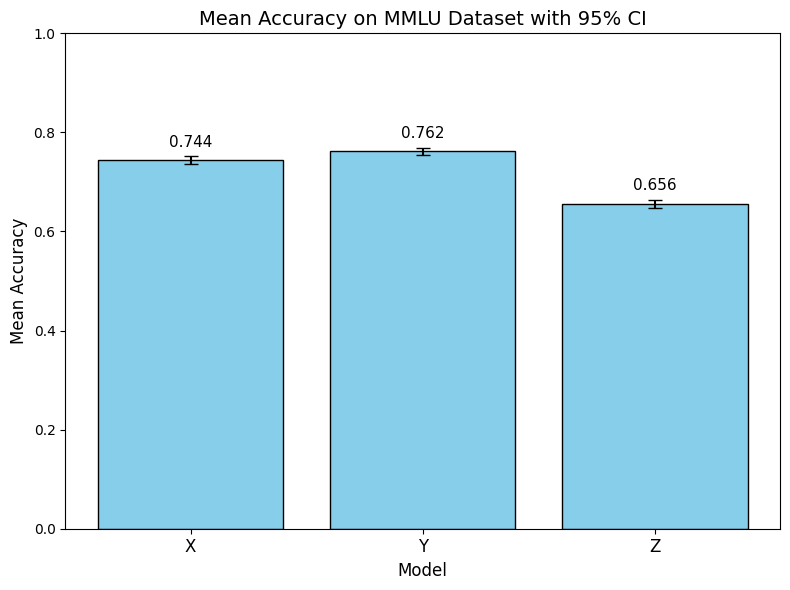

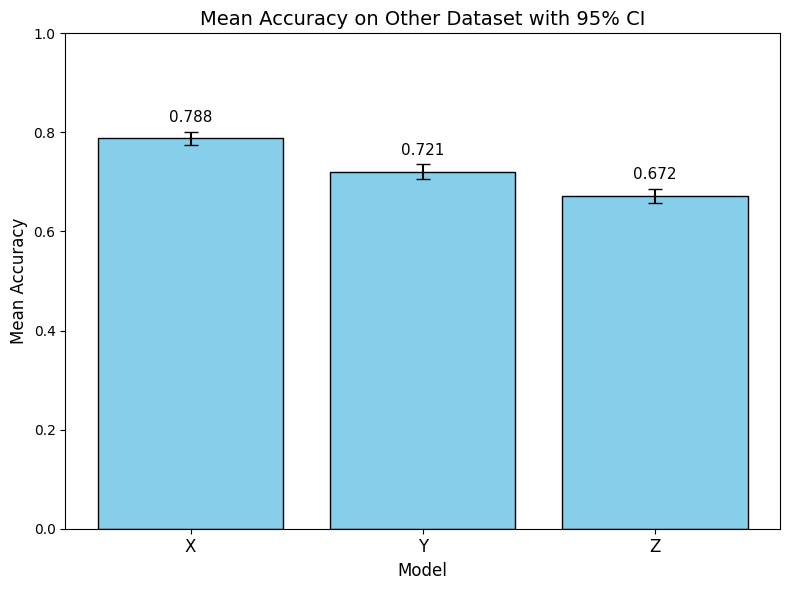

In [73]:
#B
def plot_summary(summary, dataset_name):
    # Calculate the 95% confidence interval half-width.
    summary['ci'] = 1.96 * summary['se']
    
    # Set up the bar plot.
    fig, ax = plt.subplots(figsize=(8,6))
    x = np.arange(len(summary))
    
    ax.bar(x, summary['mean'], yerr=summary['ci'], capsize=5, 
           color='skyblue', edgecolor='black')
    ax.set_xticks(x)
    ax.set_xticklabels(summary['model_name'], fontsize=12)
    ax.set_ylabel('Mean Accuracy', fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_title(f'Mean Accuracy on {dataset_name} Dataset with 95% CI', fontsize=14)
    ax.set_ylim(0, 1)
    
    # Annotate each bar with the mean value.
    for i, row in summary.iterrows():
        ax.text(x[i], row['mean'] + row['ci'] + 0.02, f"{row['mean']:.3f}", 
                ha='center', fontsize=11)
    
    plt.tight_layout()
    plt.show()

# Plot for the MMLU dataset
plot_summary(mmlu_summary, "MMLU")

# Plot for the Other dataset
plot_summary(other_summary, "Other")

The plots reveal that model performance varies between the two datasets. On the MMLU dataset, Model Y has the highest accuracy (76.15%), followed by Model X (74.36%), while Model Z performs significantly lower (65.60%). However, on the Other dataset, Model X leads with an accuracy of 78.80%, then Model Y (72.09%), with Model Z again the lowest (67.17%). Although these differences are not very big, the change in ranking between Models X and Y across datasets suggests that the models performance is depends on teh dataset. Therefore, it cannot be definitively said which model is the best overall.

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

MMLU Correct Answer Distribution:
answer
A    1611
B    2943
C    3403
D    3739
Name: count, dtype: int64

Other Dataset Correct Answer Distribution:
answer
A    1078
B    1116
C     924
D     641
Name: count, dtype: int64


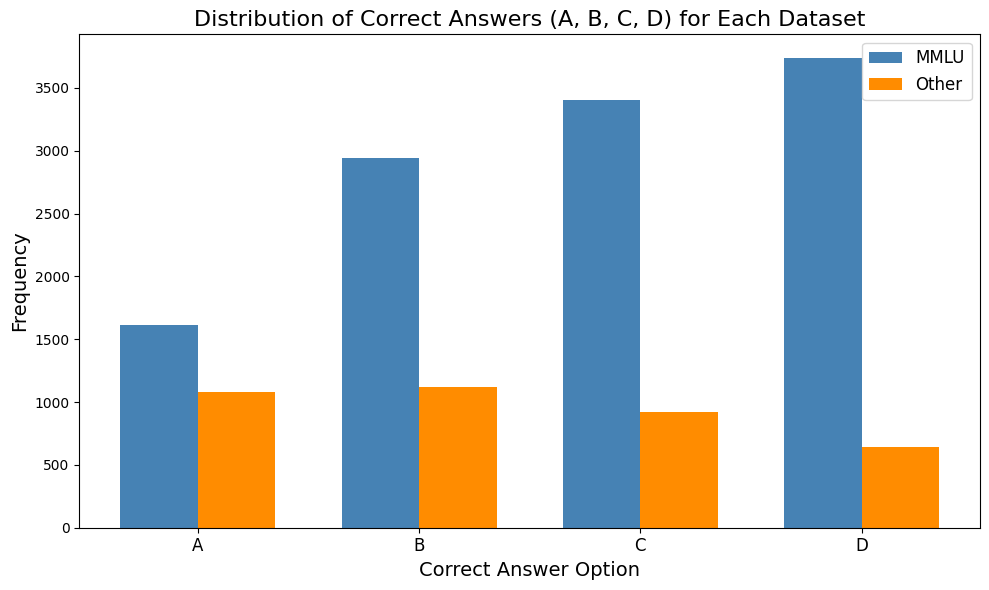

In [74]:
#A

# Drop duplicated questions so that each question appears only once.
df_mmlu_unique = df_mmlu.drop_duplicates(subset='question_id')
df_other_unique = df_other.drop_duplicates(subset='question_id')

# Count the distribution of correct answers using the 'answer' column.
counts_mmlu = df_mmlu_unique['answer'].value_counts().sort_index()
counts_other = df_other_unique['answer'].value_counts().sort_index()

# Print counts
print("MMLU Correct Answer Distribution:")
print(counts_mmlu)
print("\nOther Dataset Correct Answer Distribution:")
print(counts_other)

# Create a bar chart to visualize the distribution side-by-side.
fig, ax = plt.subplots(figsize=(10, 6))

# Define positions for the two sets of bars.
x = range(len(counts_mmlu.index))
width = 0.35

# Create bars for each dataset.
bars1 = ax.bar([i - width/2 for i in x], counts_mmlu.values, width, label='MMLU', color='steelblue')
bars2 = ax.bar([i + width/2 for i in x], counts_other.values, width, label='Other', color='darkorange')

# Set x-axis labels using the correct answer options (A, B, C, D).
ax.set_xticks(x)
ax.set_xticklabels(counts_mmlu.index, fontsize=12)

# Annotate and label the plot.
ax.set_title("Distribution of Correct Answers (A, B, C, D) for Each Dataset", fontsize=16)
ax.set_xlabel("Correct Answer Option", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [75]:
# Create 2D array (first row = MMLU, second row = Other)
array_2d = np.array([counts_mmlu.values, counts_other.values])
print("2D Array results for A:")
print(array_2d)

2D Array results for A:
[[1611 2943 3403 3739]
 [1078 1116  924  641]]


In [78]:
#B
# Chi-square test of independence
# H0: The distribution of correct answers (A, B, C, D) is independent of the dataset (both datasets have the same distribution)
# H1: The distribution of correct answers is different between the two datasets
chi2, p, dof, expected = chi2_contingency(array_2d)

print("\nChi-Square Test Results:")
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected frequencies:")
print(expected)


Chi-Square Test Results:
Chi-square statistic: 629.3958675644751
Degrees of freedom: 3
p-value: 4.270849602795191e-136
Expected frequencies:
[[2034.97534778 3071.76085409 3274.5772889  3314.68650922]
 [ 654.02465222  987.23914591 1052.4227111  1065.31349078]]


Because the p-value is extremely low (<< 0.05), we reject the null hypothesis. This indicates that the distribution of correct answers (A, B, C, D) is significantly different between the MMLU and Other datasets. This means that despite both datasets have questions of similar difficulty, the correct answer distributions is largly different, which could be contributing to the differences in model performance observed before.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [79]:
#A
# Filter LM X results from datasets
df_mmlu_X = df_mmlu[df_mmlu['model_name'] == 'X']
df_other_X = df_other[df_other['model_name'] == 'X']

# Group by correct answer and compute mean accuracy for LM X
mean_accuracy_mmlu = df_mmlu_X.groupby('answer')['correct'].mean()
mean_accuracy_other = df_other_X.groupby('answer')['correct'].mean()

print("LM X Mean Accuracy Conditioned on Correct Answer (MMLU):")
print(mean_accuracy_mmlu)
print("\nLM X Mean Accuracy Conditioned on Correct Answer (Other):")
print(mean_accuracy_other)


LM X Mean Accuracy Conditioned on Correct Answer (MMLU):
answer
A    0.972688
B    0.799185
C    0.707905
D    0.633592
Name: correct, dtype: float64

LM X Mean Accuracy Conditioned on Correct Answer (Other):
answer
A    0.974026
B    0.806452
C    0.676407
D    0.603744
Name: correct, dtype: float64


In both datasets, LM X shows the highest accuracy when the correct answer is A, with performance decreasing progressively from B to D. This indicates that LM X is particularly strong on questions where "A" is correct, and its performance degrades when the correct answer is one of the other options.

In [80]:
#B
# H0: LM X’s accuracy for questions where the correct answer is "A" is the same in both datasets.
# H1: The accuracy differs between the datasets.

# Extract LM X rows where the correct answer is "A"
accuracy_A_mmlu = df_mmlu_X[df_mmlu_X['answer'] == 'A']['correct']
accuracy_A_other = df_other_X[df_other_X['answer'] == 'A']['correct']

# Perform an independent t-test (assuming unequal variances)
t_stat_A, p_val_A = ttest_ind(accuracy_A_mmlu, accuracy_A_other, equal_var=False)

print("T-test for LM X performance when correct answer is 'A':")
print("t-statistic:", t_stat_A)
print("p-value:", p_val_A)


T-test for LM X performance when correct answer is 'A':
t-statistic: -0.21161116511164932
p-value: 0.8324287723934077


Since the p-value is much greater than 0.05, there is no statistically significant difference in LM X's performance on "A" questions between the two datasets.

In [81]:
#C

# For the MMLU dataset:
accuracy_A_mmlu = df_mmlu_X[df_mmlu_X['answer'] == 'A']['correct']
accuracy_CD_mmlu = df_mmlu_X[df_mmlu_X['answer'].isin(['C', 'D'])]['correct']

t_stat_mmlu, p_val_mmlu = ttest_ind(accuracy_A_mmlu, accuracy_CD_mmlu, equal_var=False)
print("T-test for LM X performance on MMLU (A vs. C/D):")
print("t-statistic:", t_stat_mmlu)
print("p-value:", p_val_mmlu)

# For the Other dataset:
accuracy_A_other = df_other_X[df_other_X['answer'] == 'A']['correct']
accuracy_CD_other = df_other_X[df_other_X['answer'].isin(['C', 'D'])]['correct']

t_stat_other, p_val_other = ttest_ind(accuracy_A_other, accuracy_CD_other, equal_var=False)
print("\nT-test for LM X performance on Other (A vs. C/D):")
print("t-statistic:", t_stat_other)
print("p-value:", p_val_other)


T-test for LM X performance on MMLU (A vs. C/D):
t-statistic: 44.05883659993774
p-value: 0.0

T-test for LM X performance on Other (A vs. C/D):
t-statistic: 25.13948464328854
p-value: 1.1880049447651482e-121


In both datasets, LM X performs significantly better on questions with the correct answer A than on those with correct answers C or D. The extremely low p-values (well below 0.05) confirm that this difference is statistically significant.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [82]:
#A
# Group the data by model_name and answer, then compute the mean accuracy
accuracy_by_model_mmlu = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean().unstack()
accuracy_by_model_other = df_other.groupby(['model_name', 'answer'])['correct'].mean().unstack()

print("Mean Accuracy by Model Conditioned on Correct Answer (MMLU):")
print(accuracy_by_model_mmlu)
print("\nMean Accuracy by Model Conditioned on Correct Answer (Other):")
print(accuracy_by_model_other)


Mean Accuracy by Model Conditioned on Correct Answer (MMLU):
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139

Mean Accuracy by Model Conditioned on Correct Answer (Other):
answer             A         B         C         D
model_name                                        
X           0.974026  0.806452  0.676407  0.603744
Y           0.625232  0.663978  0.762987  0.920437
Z           0.680891  0.667563  0.662338  0.677067


B. /Discuss:/

Model X:
In both datasets, LM X achieves exceptionally high accuracy when the correct answer is A (more than 97%). Its performance then declines for B (around 80%), drops even further for C (around 70% for MMLU and 68% for Other), and is lowest for D (63% for MMLU and 60% for Other). This indicates that LM X is better at handling questions where the correct answer is A, but its accuracy lowers as the correct answer shifts from A to D = this model likes "A".

Model Y:
In contrast to LM X, LM Y exhibits the opposite pattern. Its accuracy is lowest when the correct answer is A (approximately 62–63%), improves for B and C (around 66–73%), and is the best when the correct answer is D (>90%). This suggests that LM Y may have a bias to questions where the correct answer is D, while struggling more with questions where other option is correct.

Model Z:
Model Z shows a more balanced performance with accuracy between 64% and 68% in both datasets. This indicates that LM Z does not favor any particular answer option as strongly as the other models do and its performance is relatively uniform regardless the correct answer.

Overall Observations:
The patterns are consistent across both datasets, which shows the findings are reasonable and not due to randomness.
The large differences for Models X and Y (e.g., X performing extremely well on A but poorly on D, and Y showing the exact opposite) suggest that the models might be biased or better tuned for certain types of questions or answer formats.
Model Z’s even performance across all answer options may indicate a more balanced predictions, but with lower overall accuracy compared to the best-case performance of X and Y.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. /Discuss:/

This strategy is most likely designed to test whether the language models are influenced by positional biases. In multiple-choice tests, models (and also humans) might develop a bias toward certain answer (favoring cetrain option). This bias could be due to training data structure or simply because of the patterns learned during training (certain option is correct more, eg. common believe that selecting "C" yields in better results).

By shuffling the correct answer positions, if a model is merely exploiting answer position (for example, consistently choosing the first option), shuffling will disrupt that strategy. A truly robust model should still perform at a similar level when the correct answer is no longer in its typical position. If performance changes significantly after shuffling, it indicates that the model’s previous high performance might have been due to exploiting the fixed positions of correct answers rather than reasoning or understanding of the questions.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

Original Accuracy:
model_name
X    0.743588
Y    0.761542
Z    0.655951
Name: correct, dtype: float64

Test-Retest Metric:
model_name
X    0.650137
Y    0.641501
Z    0.561218
Name: same, dtype: float64


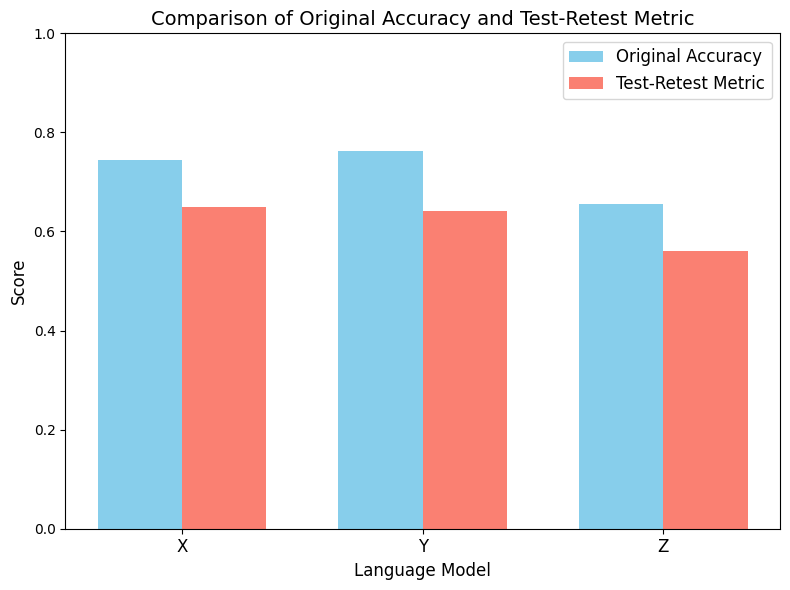

In [83]:
#fancy code
# Load original and shuffled results
df_original = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_shuffled = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')

# Merge DataFrames on 'question_id' and 'model_name' to align each question's result for each model.
# Original results have suffix '_orig' and shuffled results have '_shuf' for distinction.
df_merged = pd.merge(df_original, df_shuffled, on=['question_id', 'model_name'], suffixes=('_orig', '_shuf'))

# Compute new column that is 1 if the model's result is the same between the original and shuffled version, 0 otherwise.
df_merged['same'] = (df_merged['correct_orig'] == df_merged['correct_shuf']).astype(int)

# For each model, compute the test-retest metric.
# M is the number of shuffles—in our case, we have one shuffled version (M = 1).
# The metric is the average, over all N questions, of the indicator that the original and shuffled correctness agree.
test_retest = df_merged.groupby('model_name')['same'].mean()

# Compute the original accuracy for each model
accuracy_orig = df_original.groupby('model_name')['correct'].mean()

print("Original Accuracy:")
print(accuracy_orig)
print("\nTest-Retest Metric:")
print(test_retest)

# Create bar plot to compare original accuracy and test-retest metric for each model
models = accuracy_orig.index.tolist()       
accuracy_values = accuracy_orig.values       
test_retest_values = test_retest.values

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, accuracy_values, width, label='Original Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_retest_values, width, label='Test-Retest Metric', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("Language Model", fontsize=12)
ax.set_title("Comparison of Original Accuracy and Test-Retest Metric", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

Original Accuracy Summary:
  model_name      mean  count        se        ci
0          X  0.743588  11696  0.004038  0.007914
1          Y  0.761542  11696  0.003940  0.007723
2          Z  0.655951  11696  0.004393  0.008610

Test-Retest Summary:
  model_name      mean  count        se        ci
0          X  0.650137  11696  0.004410  0.008643
1          Y  0.641501  11696  0.004434  0.008691
2          Z  0.561218  11696  0.004589  0.008993


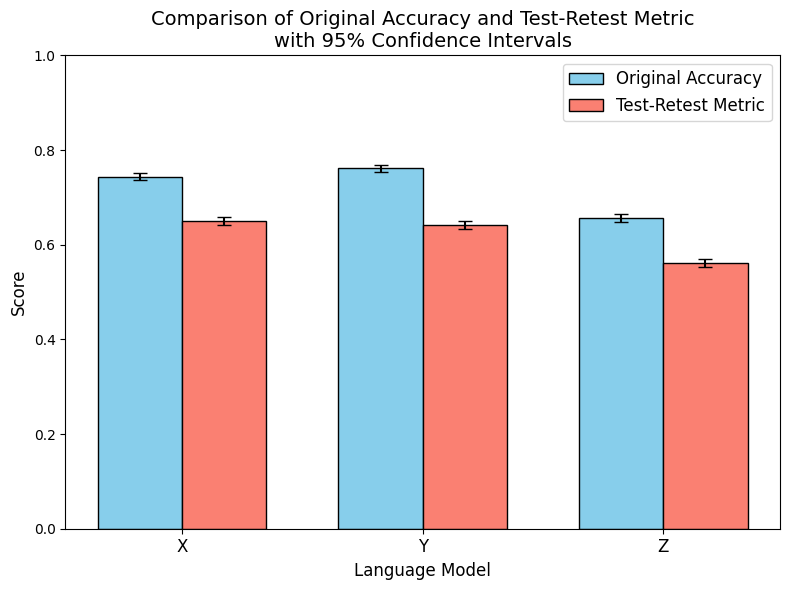

In [84]:
# --- Compute summary statistics for Original Accuracy ---
acc_summary = df_original.groupby('model_name')['correct'].agg(['mean', 'count']).reset_index()
# Compute the standard error for each model: SE = sqrt(p*(1-p)/n)
acc_summary['se'] = np.sqrt(acc_summary['mean'] * (1 - acc_summary['mean']) / acc_summary['count'])
# Compute the 95% CI half-width: 1.96 * SE
acc_summary['ci'] = 1.96 * acc_summary['se']

# --- Compute summary statistics for Test-Retest Metric ---
tt_summary = df_merged.groupby('model_name')['same'].agg(['mean', 'count']).reset_index()
# Compute standard error for the test-retest metric
tt_summary['se'] = np.sqrt(tt_summary['mean'] * (1 - tt_summary['mean']) / tt_summary['count'])
# Compute the 95% CI half-width
tt_summary['ci'] = 1.96 * tt_summary['se']

# Print summaries for verification
print("Original Accuracy Summary:")
print(acc_summary)
print("\nTest-Retest Summary:")
print(tt_summary)

# --- Create a bar plot to compare the two metrics with error bars ---
models = acc_summary['model_name'].tolist()  
x = np.arange(len(models))                 
width = 0.35                    

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, acc_summary['mean'], width, 
               yerr=acc_summary['ci'], capsize=5, 
               label='Original Accuracy', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, tt_summary['mean'], width, 
               yerr=tt_summary['ci'], capsize=5, 
               label='Test-Retest Metric', color='salmon', edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("Language Model", fontsize=12)
ax.set_title("Comparison of Original Accuracy and Test-Retest Metric\nwith 95% Confidence Intervals", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [86]:
#A
# Get language models from the dataset
models = df_mmlu['model_name'].unique()

# Loop over each model and compute statistics.
for model in models:
    # Filter data for current model.
    df_model = df_mmlu[df_mmlu['model_name'] == model]
    
    # 1. Distribution of the answers they give.
    answer_distribution = df_model['result'].value_counts().sort_index()
    
    # 2. Accuracy conditioned on the answer they give.
    cond_accuracy = df_model.groupby('result')['correct'].mean()
    
    # Print results for the current model.
    print(f"Model {model} - Distribution of Answers Given:")
    print(answer_distribution)
    print(f"\nModel {model} - Accuracy Conditioned on the Answer Given:")
    print(cond_accuracy)
    print("\n" + "-"*50 + "\n")


Model X - Distribution of Answers Given:
result
A    4259
B    2659
C    2409
D    2369
Name: count, dtype: int64

Model X - Accuracy Conditioned on the Answer Given:
result
A    0.367927
B    0.884543
C    1.000000
D    1.000000
Name: correct, dtype: float64

--------------------------------------------------

Model Y - Distribution of Answers Given:
result
A    1072
B    2256
C    3015
D    5353
Name: count, dtype: int64

Model Y - Accuracy Conditioned on the Answer Given:
result
A    0.937500
B    0.897606
C    0.827861
D    0.631608
Name: correct, dtype: float64

--------------------------------------------------

Model Z - Distribution of Answers Given:
result
A    2176
B    2885
C    3237
D    3398
Name: count, dtype: int64

Model Z - Accuracy Conditioned on the Answer Given:
result
A    0.476103
B    0.654073
C    0.703429
D    0.727487
Name: correct, dtype: float64

--------------------------------------------------



B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [50]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [51]:
#A

In [52]:
#B

In [53]:
#C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [54]:
#A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [55]:
#A

B. /Discuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.